# FRAUD DETECTION USING NAIVE BAYES:

Fraud is the event of illegal access or execution of a transaction. Fraud modeling is the process where large amounts of transactional data is analyzed to identify observations which do not generally follow the regular patterns. Due to this nature of the problem, anamoly detection and some classification techniques are most suited to analyze such problems and draw valuable insights.

# Alpha Solutions Fraud Detection Problem
A company Alpha solutions provides fraud detection products, solutions and services to financial businesses. One such financial client has many credit card transactions that are provided as the training data. They want the Financial Data Scientist to build models using the available training data.

     1.Ingest the data into a format that is easy for analysis.
     2.Perform Exploratory Data Analysis on the dataset.
     3.Perform classification on the dataset to detect fraud.
     
# Loading the Data
     -> github data set can be loaded with "Pandas.read_csv" method module url:https://raw.githubusercontent.com/colaberry/data/master/Fraud/fraud_data.csv
     
# Fraud Detection - Data Seletcion & Preparation

-> Prior to fitting a Naive Bayes model for classifying who have done fraud, we have to examine the dataset with information        from EDA as well as using other statistical methods. The logistic Naive Bayes is also a supervised learning technique.
-> Sparse column entries in certain columns such as Cabin. NaN entries in columns. Categorical variables with string       entries. Selection of right columns. Sparsity Let us examine sparse columns by counting the ratio of NaNs to all the values.    describe() function on dataframe provides information about mean, median and the number of values ignoring NaNs only for   float/integer columns.

# Replacing Nan with relevant values

-> we can replace Nan/None/null values with "DataFrame.interpolate()" method.
-> Interpolate method estimates the nan/None/null values with use of recent i.e, above/below values.

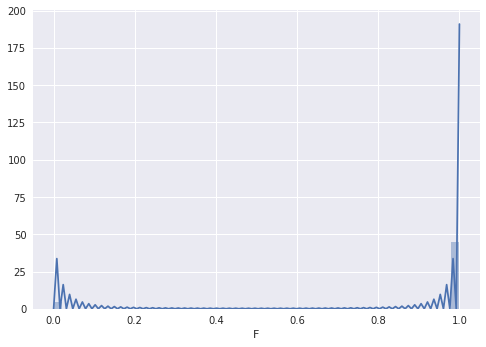

In [216]:
#loading data
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/colaberry/data/master/Fraud/fraud_data.csv")
#interpolating null/Nan/None values if any
df=df.interpolate()
#Visualizing Fraud Frequency
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['F'])

Hint: Just press continue

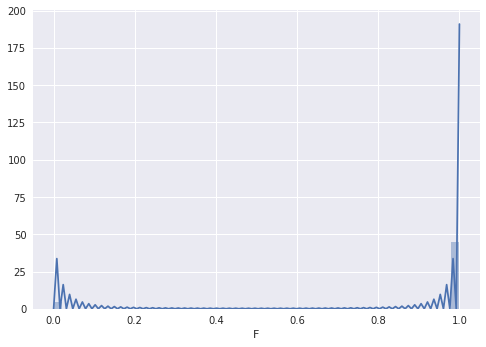

In [217]:
#loading data
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/colaberry/data/master/Fraud/fraud_data.csv")
#interpolating null/Nan/None values if any
df=df.interpolate()
#Visualizing Fraud Frequency
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['F'])

In [218]:
print("continue")

continue


# Selecting Right Columns (Feature Selection)
-> Inorder to select the right columns(Features) we choose based on correlation coefficient (R-value)
-> we find correlation coefficient between label(output) and Features(columns)
-> We use spearmanr(Feature,label) method to get R-values and P-values.
NOTE:
    if correlation coefficient(R-value) is near to -1 or 1 then we can select that feature
# Features Avaliable
S-Sex: Male(0)Female(1); A-Age:<=30(0),30-50(1),>50(2);F-Fraud:Yes(0),No(1);G-Gas:0,1;J-Jewellery:01
    
# Features visualizing with Label. 
->This can be done with matplotlib and seaborn

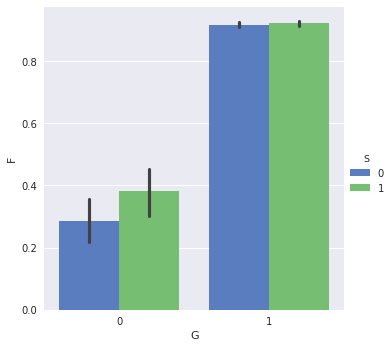

In [219]:
import scipy.stats as SS
#SS.spearmanr(df['S'],df['F'])#Sex vs Fraud "SpearmanrResult(correlation=0.015576043620676137, pvalue=0.1193508418520139)"
#SS.spearmanr(df['A'],df['F'])#Age vs Fraud "SpearmanrResult(correlation=0.011419612846995992, pvalue=0.2535139803960747)"
#SS.spearmanr(df['J'],df['F'])#Jewellery vs Fraud "SpearmanrResult(correlation=-0.75777043663175803, pvalue=0.0)"
#SS.spearmanr(df['G'],df['F'])#Gas vs Fraud  "SpearmanrResult(correlation=0.3331411347655443, pvalue=9.5582308526994276e-258)"
#As you can see the above respective correlation values with Fraud
#Jewellery and Gas features can be selected as their corelation values are relatively high 
g = sns.factorplot(x="G", y="F", hue="S", data=df,size=5, kind="bar", palette="muted")
sns.plt.show()

Hint: Just press continue

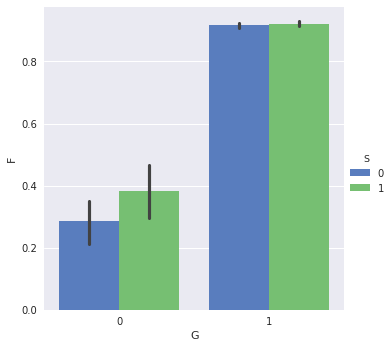

In [220]:
import scipy.stats as SS
#SS.spearmanr(df['S'],df['F'])#Sex vs Fraud "SpearmanrResult(correlation=0.015576043620676137, pvalue=0.1193508418520139)"
#SS.spearmanr(df['A'],df['F'])#Age vs Fraud "SpearmanrResult(correlation=0.011419612846995992, pvalue=0.2535139803960747)"
#SS.spearmanr(df['J'],df['F'])#Jewellery vs Fraud "SpearmanrResult(correlation=-0.75777043663175803, pvalue=0.0)"
#SS.spearmanr(df['G'],df['F'])#Gas vs Fraud  "SpearmanrResult(correlation=0.3331411347655443, pvalue=9.5582308526994276e-258)"
#As you can see the above respective correlation values with Fraud
#Jewellery and Gas features can be selected as their corelation values are relatively high 
g = sns.factorplot(x="G", y="F", hue="S", data=df,size=5, kind="bar", palette="muted")
sns.plt.show()

In [221]:
print("continue")

continue


# Spliting Data into testing and training samples and

# Naive Bayes using sklearn

-> we are going to use this technique which is based on Bayes theorem
  : P(c/x)=[P(x/c)P(c)]/P(x)

In [222]:
from sklearn.model_selection import train_test_split as tts
df_features=pd.DataFrame(df,columns=['J','G'])#the previously selected features have been framed to another DataFrame(df_features) 
X_train,X_test,Y_train,Y_test=tts(df_features,df['F'],test_size=0.2)
#Data Description
df.describe()

,S,A,F,J,G
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.504200,1.099400,0.902600,0.137600,0.971000
std,0.500007,0.772515,0.296516,0.344497,0.167815
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000


Hint: just press continue

In [223]:
from sklearn.model_selection import train_test_split as tts
df_features=pd.DataFrame(df,columns=['J','G'])#the previously selected features have been framed to another DataFrame(df_features) 
X_train,X_test,Y_train,Y_test=tts(df_features,df['F'],test_size=0.2)
#Data Description
df.describe()

,S,A,F,J,G
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.504200,1.099400,0.902600,0.137600,0.971000
std,0.500007,0.772515,0.296516,0.344497,0.167815
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000


In [224]:
print("continue")

continue


# we use fit and predict methods to rain aswell to predict Labels i.e, Frauds and
# calculate the accuracy

In [225]:
from sklearn.naive_bayes import GaussianNB as G
model=G()
model.fit(X_train,Y_train)
Yp_test=model.predict(X_test)
count=0
for i in range(len(Yp_test)):
    if (Yp_test==Y_test).values[i]==True:
        count=count+1 
arcy=count/len(Yp_test)
print("accuracy:"+str(arcy))

accuracy:0.9465


#Hint: "Y_test==Yp_test" returns Boolean Series
#use accuracy variable as "arcy"

In [226]:
count=0
for i in range(len(Yp_test)):
    if (Yp_test==Y_test).values[i]==True:
        count=count+1 
arcy=count/len(Yp_test)
print("accuracy:"+str(arcy))

accuracy:0.9465
